## 합성곱 구현 프로젝트 과제

### 필요한 모듈 임포트

In [9]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

### cifar10 이미지 로딩

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


### 이미지 시각화

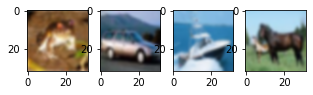

In [11]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

### 이미지 정규화 ( 스케일링 )

In [12]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


### 모델 구현 및 훈련 - 재구현 필요

In [36]:
num_classes = 10     
batchSize = 512                   #-- Training Batch Size
num_epochs = 20                   #-- Number of epochs for training   
learningRate= 0.01                #-- Learning rate for the network
img_rows = 32                     #-- input image dimensions
img_cols = 32 
img_ch=3

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_rows, img_cols, img_ch)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

print(X_train.shape)
print(y_train.shape)

model.fit(X_train, y_train, batch_size=batchSize, epochs=num_epochs)

(50000, 32, 32, 3)
(50000, 1)
Epoch 1/20
98/98 [==============================] - 1s 10ms/step - loss: 1.8578 - accuracy: 0.3077
Epoch 2/20
98/98 [==============================] - 1s 10ms/step - loss: 1.2084 - accuracy: 0.5637
Epoch 3/20
98/98 [==============================] - 1s 10ms/step - loss: 0.9594 - accuracy: 0.6608
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.7753 - accuracy: 0.7287
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6660 - accuracy: 0.7604
Epoch 6/20
98/98 [==============================] - 1s 10ms/step - loss: 0.5410 - accuracy: 0.8106
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.4436 - accuracy: 0.8434
Epoch 8/20
98/98 [==============================] - 1s 10ms/step - loss: 0.3483 - accuracy: 0.8810
Epoch 9/20
98/98 [==============================] - 1s 10ms/step - loss: 0.2770 - accuracy: 0.9035
Epoch 10/20
98/98 [==============================] - 1s 10ms/step - loss: 0.204

In [37]:
result = model.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 1s 2ms/step - loss: 1.5045 - accuracy: 0.7511
[1.5044598579406738, 0.7511000037193298]
